In [39]:
import requests
import json
import io
from html.parser import HTMLParser
from datetime import datetime
from datetime import timedelta
import sport_api
import fantasy_logic
import parse_class
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
def read_params(fn): 
    d ={} 
    try:
        with open(fn, 'r',encoding="utf-8") as file: 
            d = json.load(file) 
    except FileNotFoundError:
        print ("Error. Can't find file " + fn)
        d = {}
    return d 

def save_changes_into_repo(settings, commit_text, project):
    user = settings["gitlab"]["user"]
    password = settings["gitlab"]["password"]
    project = settings["gitlab"][project]["project"]
    return "!sh backup.sh '%s' '%s' '%s' '%s' " % (commit_text, user, password, project)
    

In [ ]:
save_changes_into_repo(settings, "test", "fantasy")

In [23]:
#parser = MyHTMLParser()
settings =  read_params('settings.json')
sports = sport_api.sportsApiMethods(settings)
all_tournaments = []

In [37]:
def get_plot_statistics(sports, key, settings):
    team_id = settings["fantasy_settings"]["tournaments"][key]["team_id"]
    tours_stats = sports.getMyTeamInfoAllTours(team_id = team_id).reset_index()
    if len(tours_stats) == 0:
        return    
    all_tournaments.append(tours_stats)
    tours_stats['points'] = tours_stats.apply(lambda x: str(x['points']).replace('-', '0'), axis=1)
    tours_stats = tours_stats[tours_stats['row'] != '0']
    tours_stats['points'] = tours_stats['points'].astype(int)
    fig, ax1 = plt.subplots()
    
    fig.set_size_inches(18, 10)
    tours_stats.replace('-', '0').groupby('tour').agg({'points':'sum'}).plot(marker='X', ax = ax1)
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    ax1.set_xticklabels([int(i) for i in np.arange(start, end, 1)])
    plt.xticks(rotation=30)
    plt.title(key)
    plt.grid(True)
    plt.savefig('static/png/%s.png' % key)

In [15]:
#all_tournaments[10].transpose()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


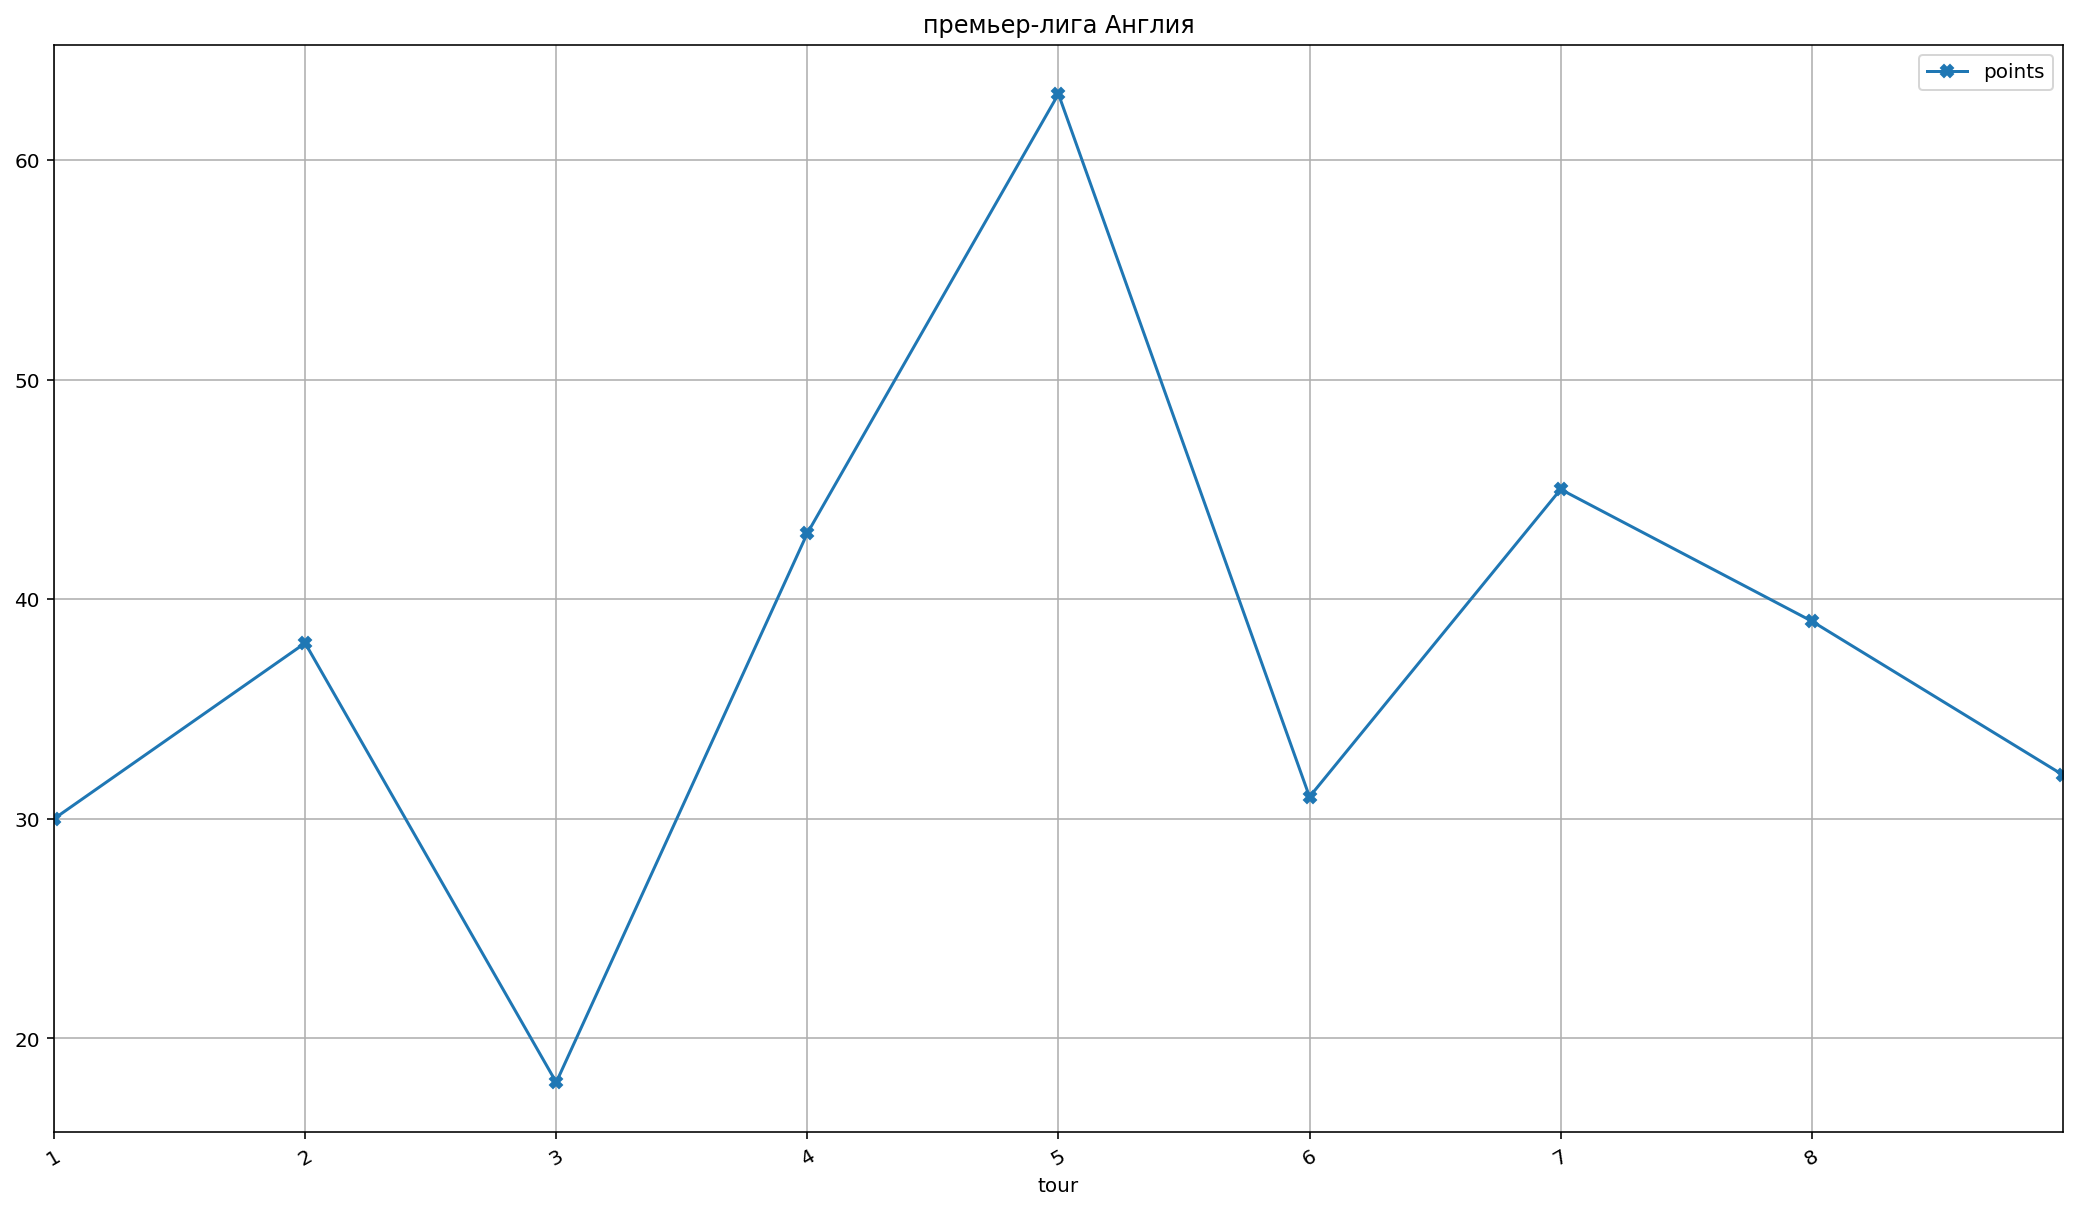

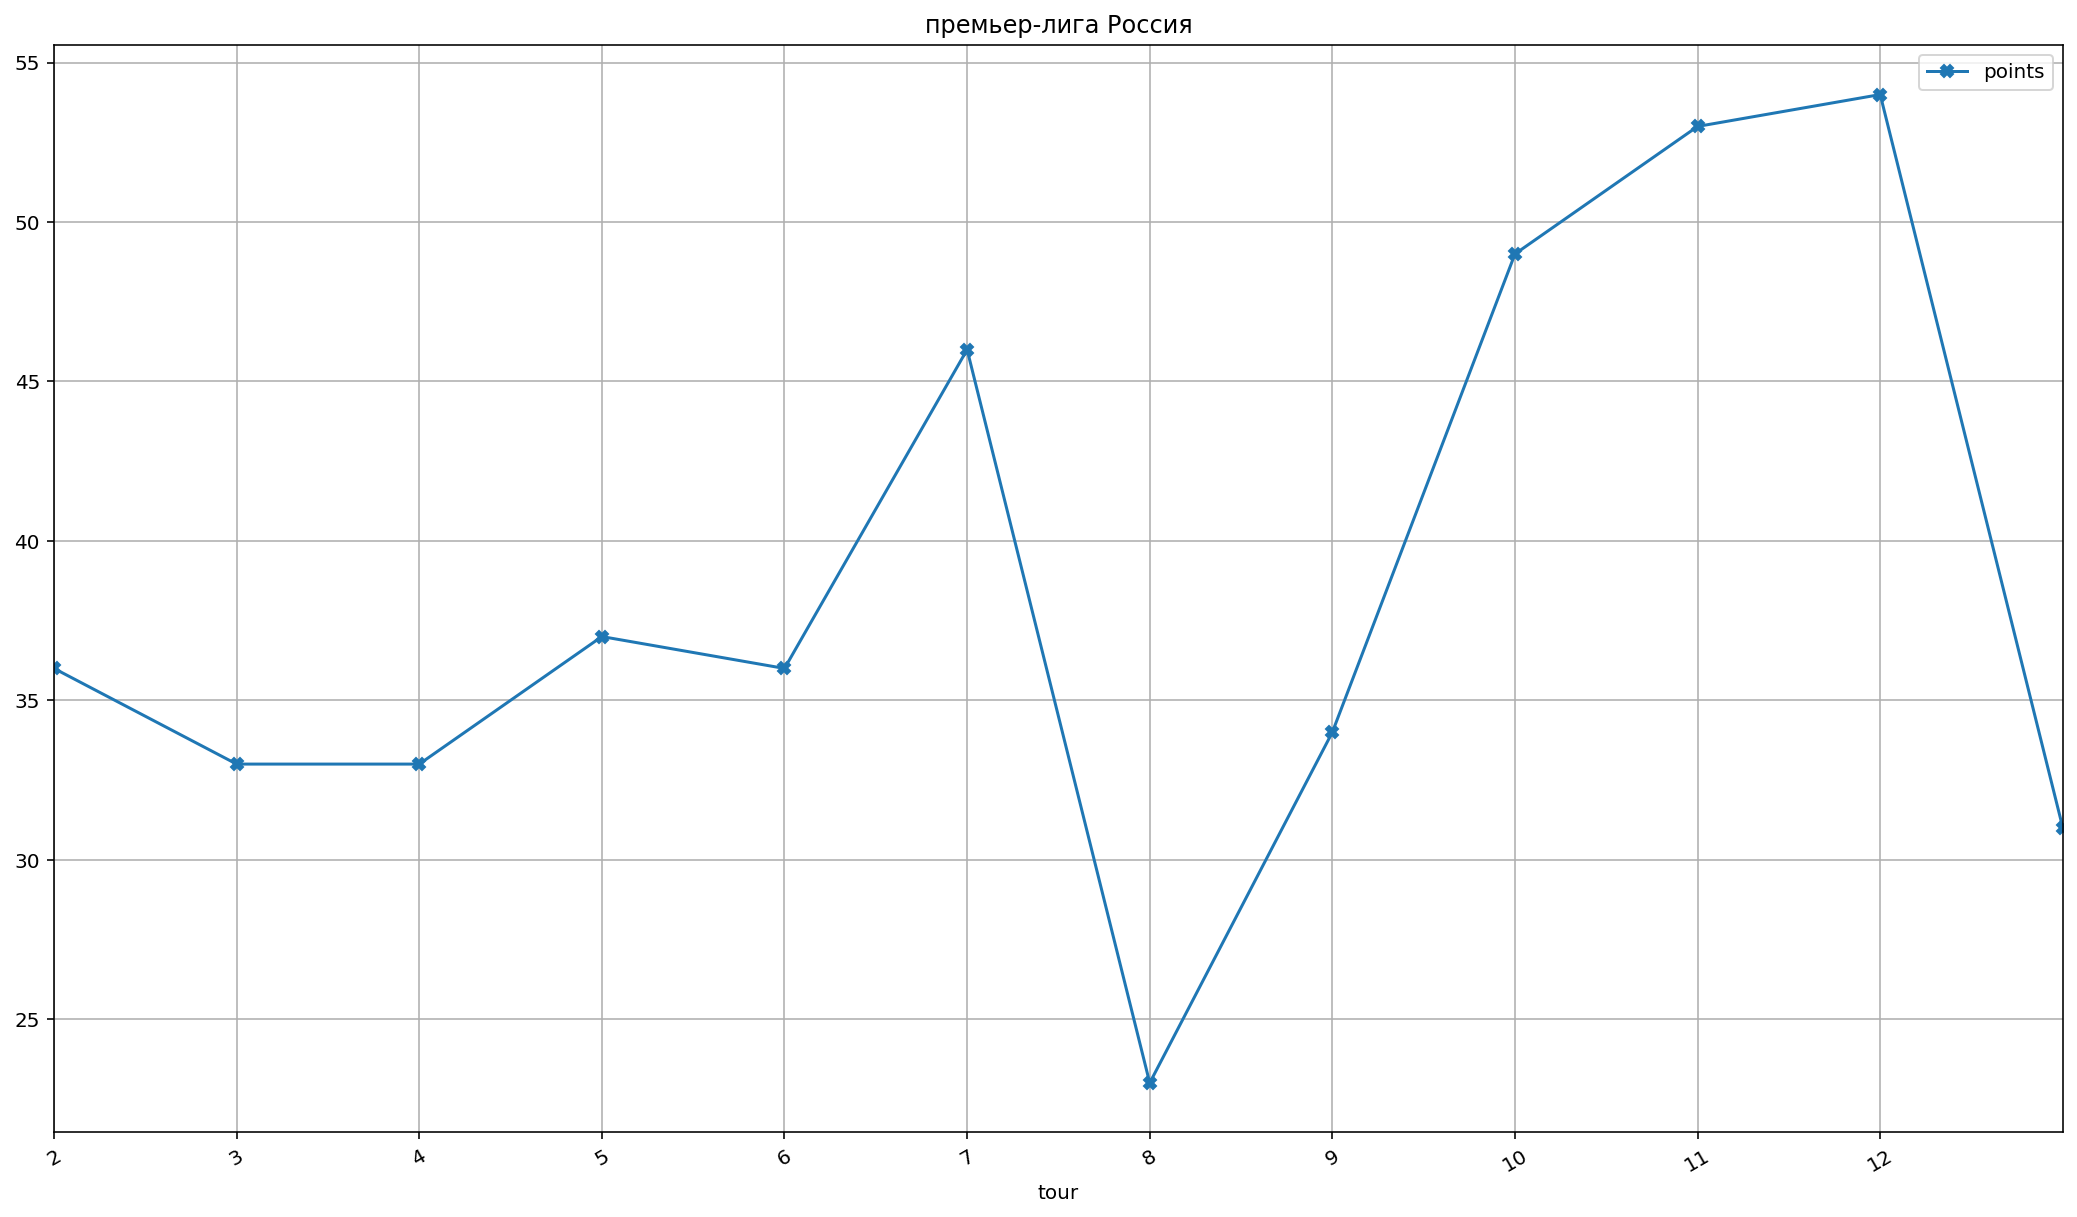

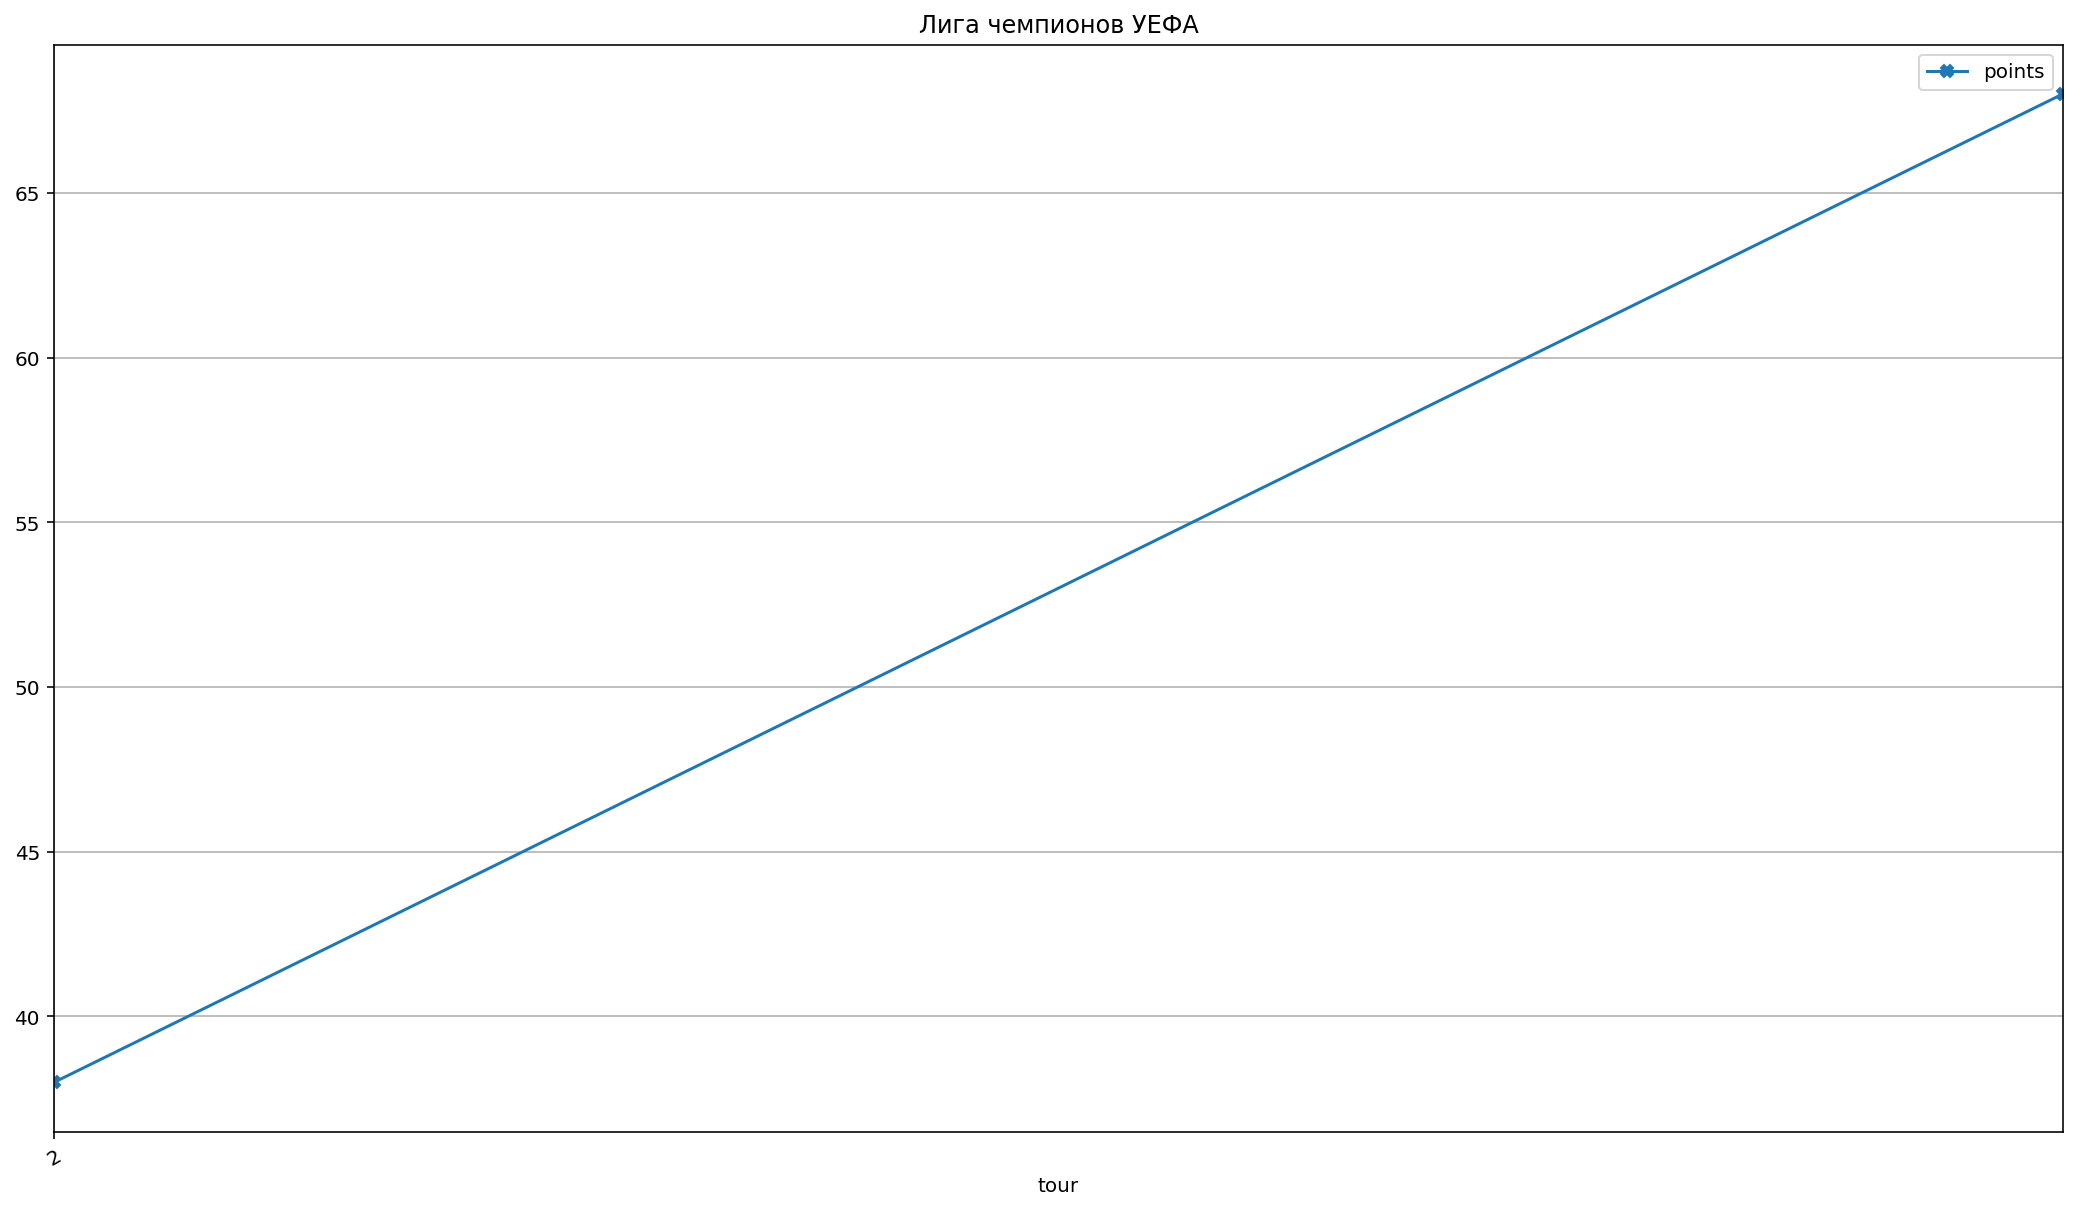

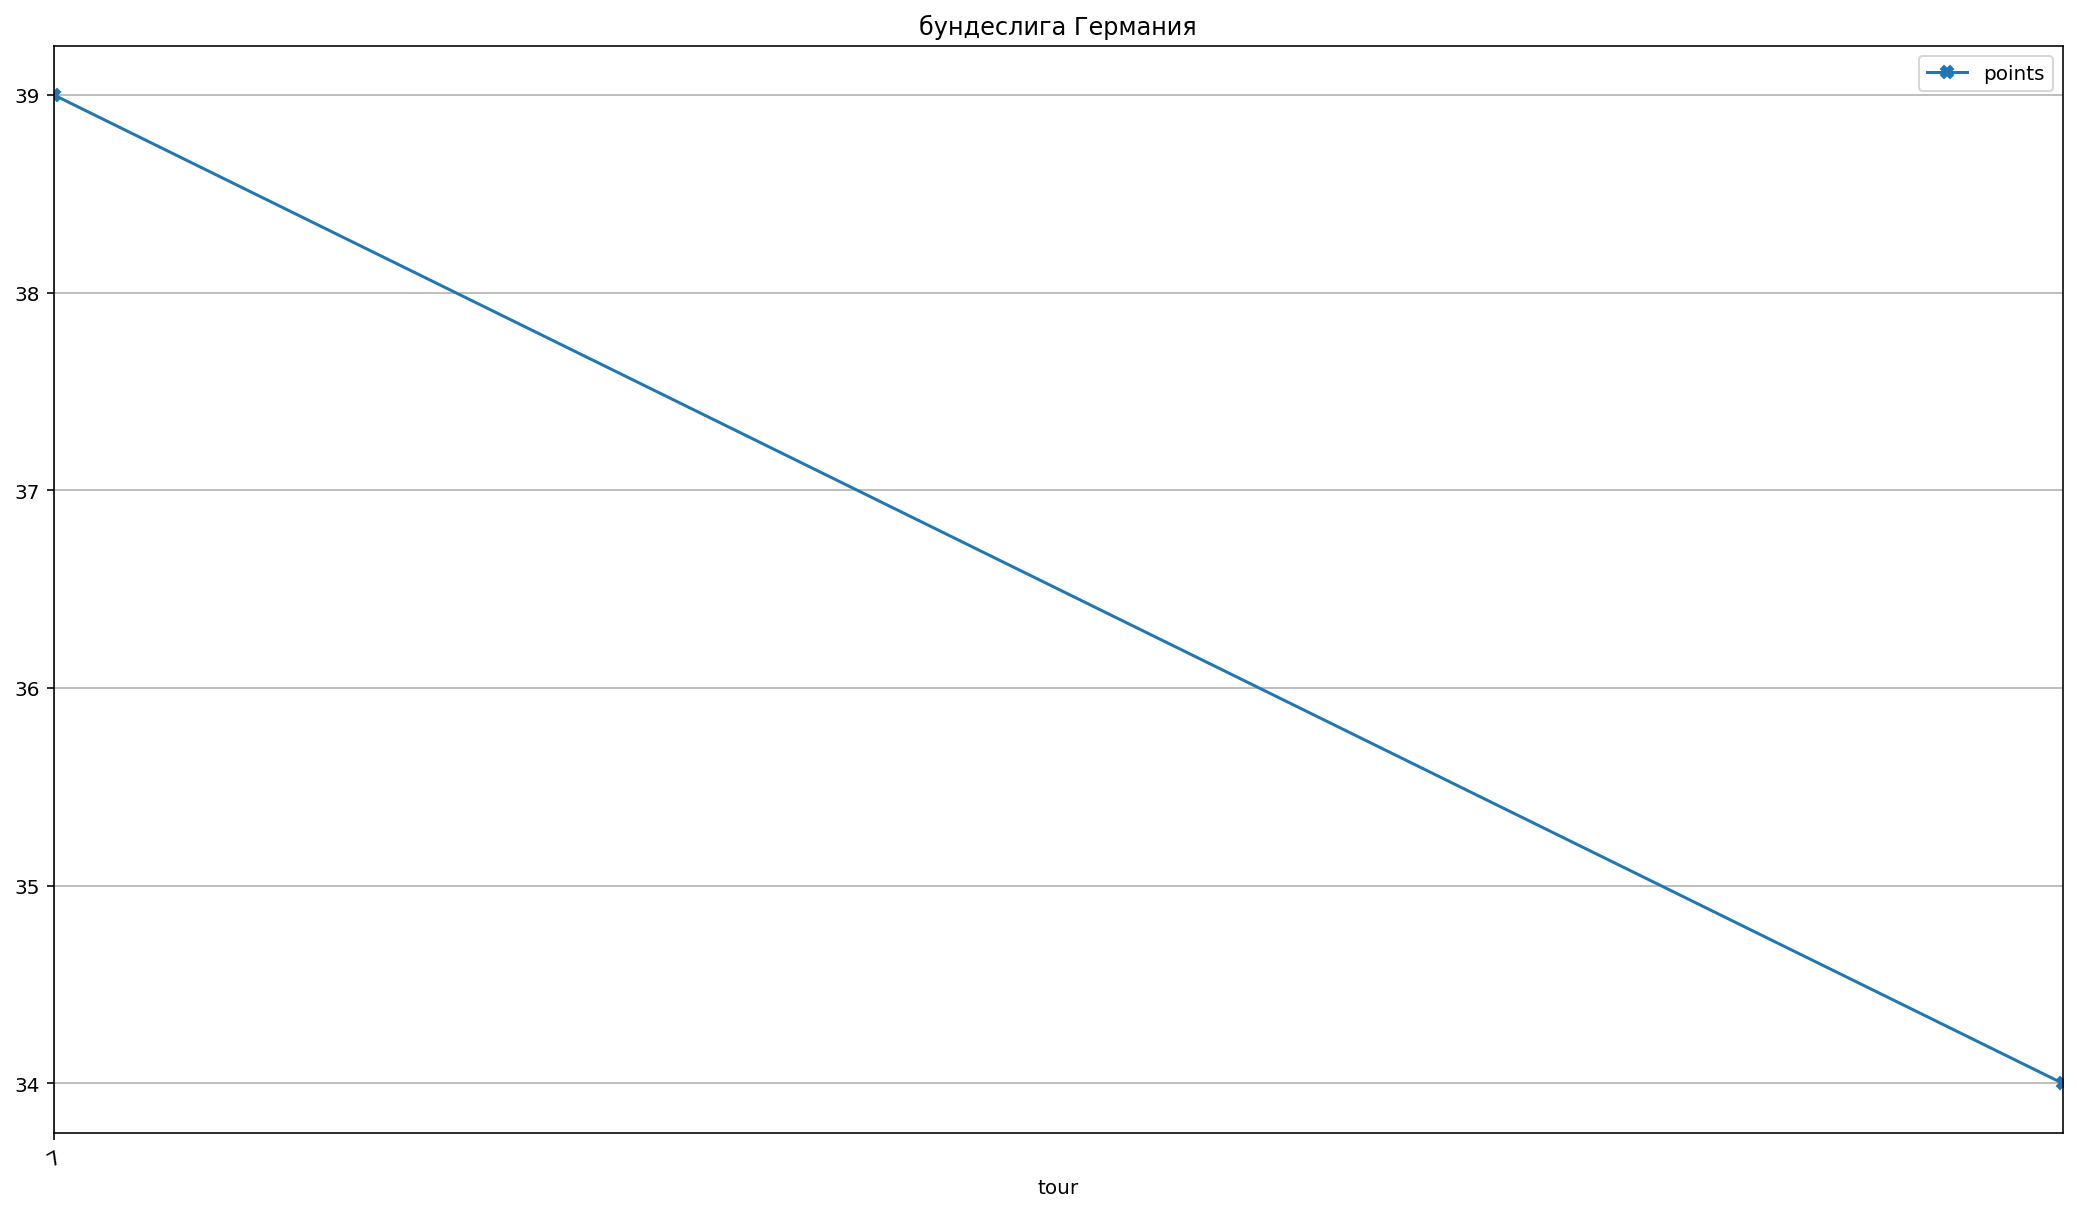

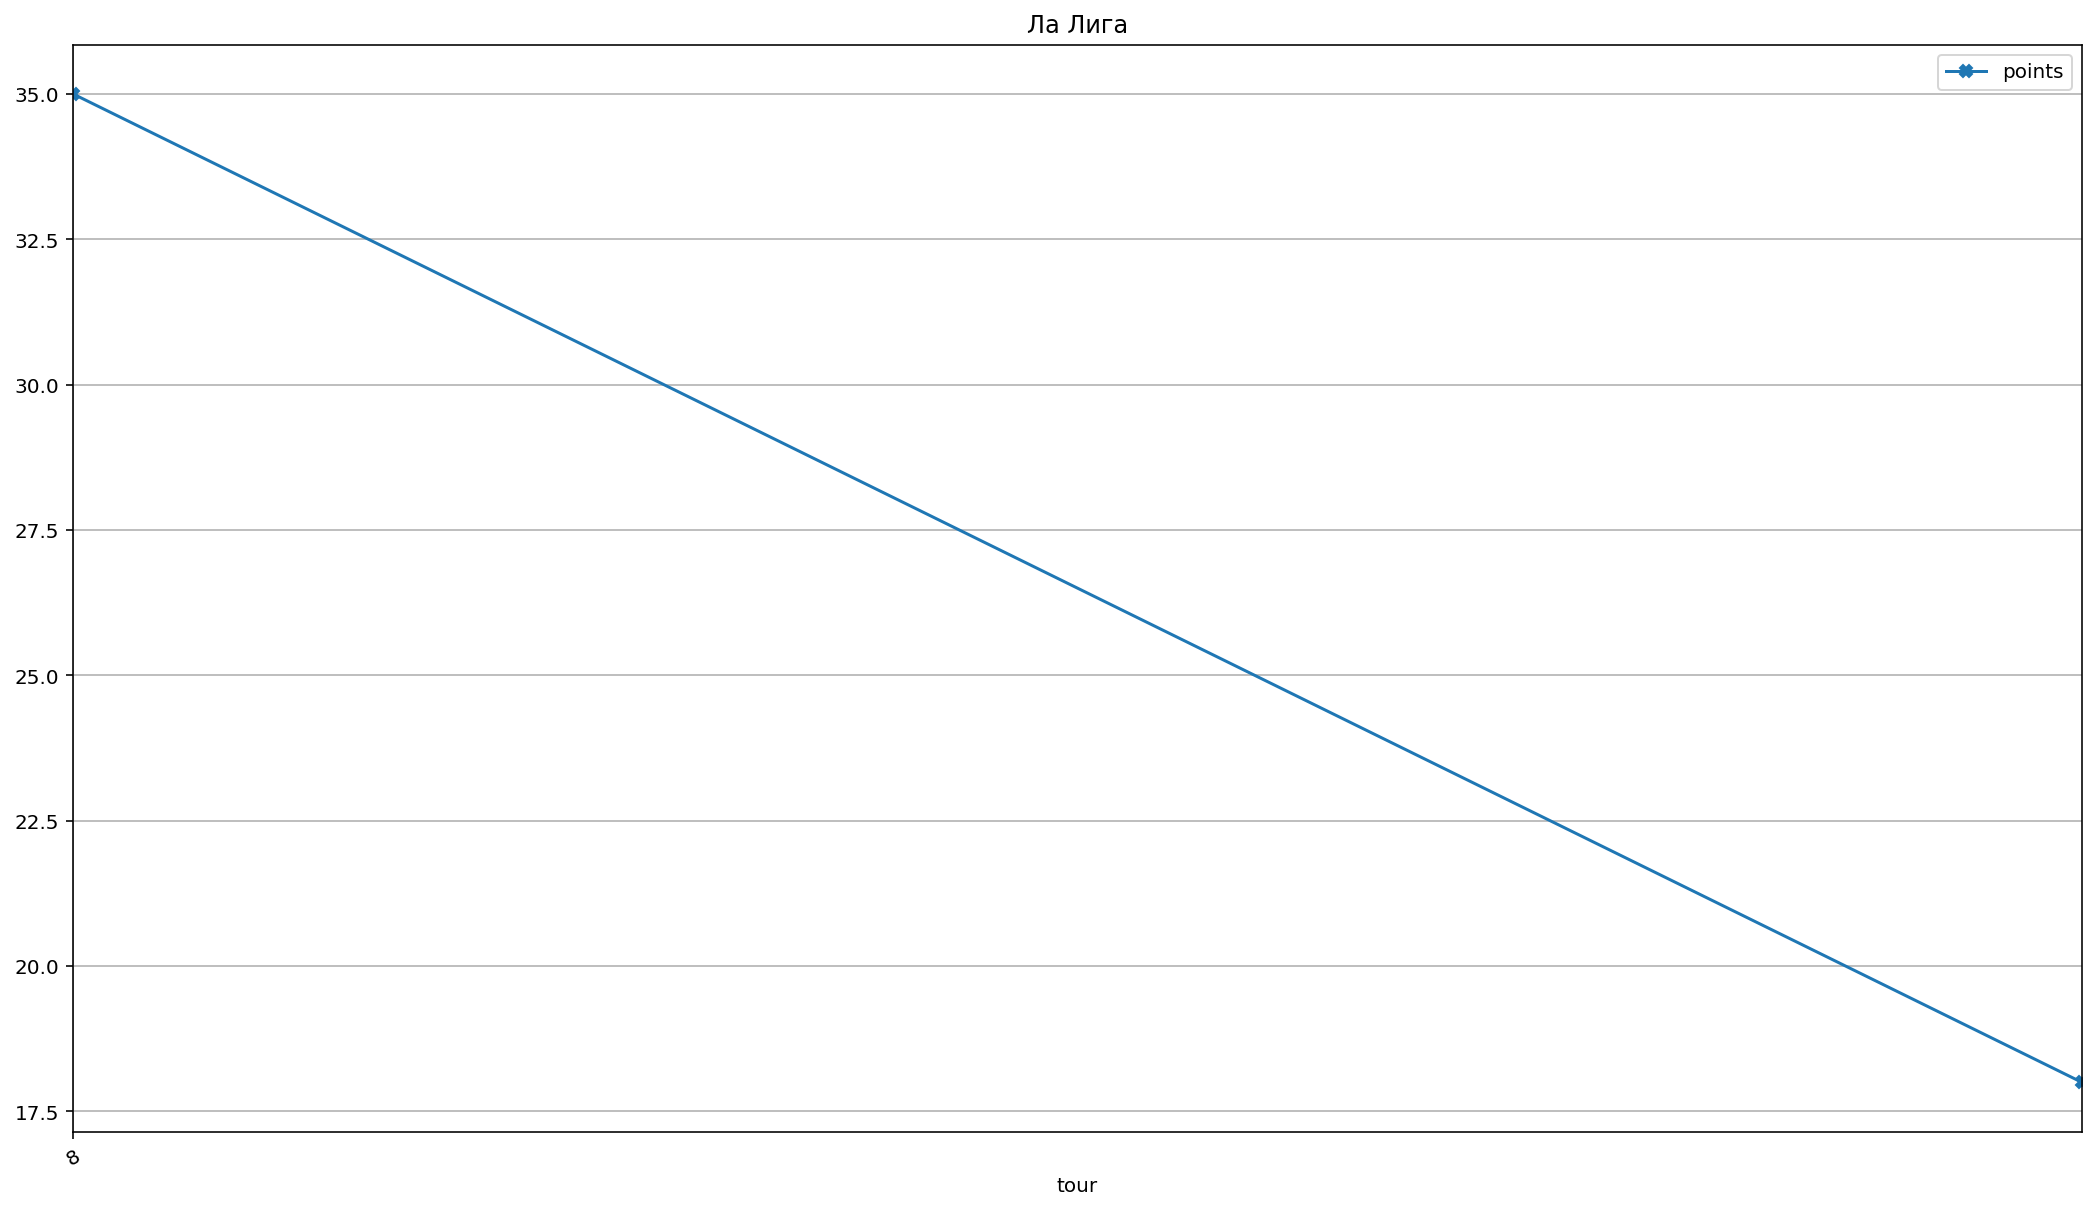

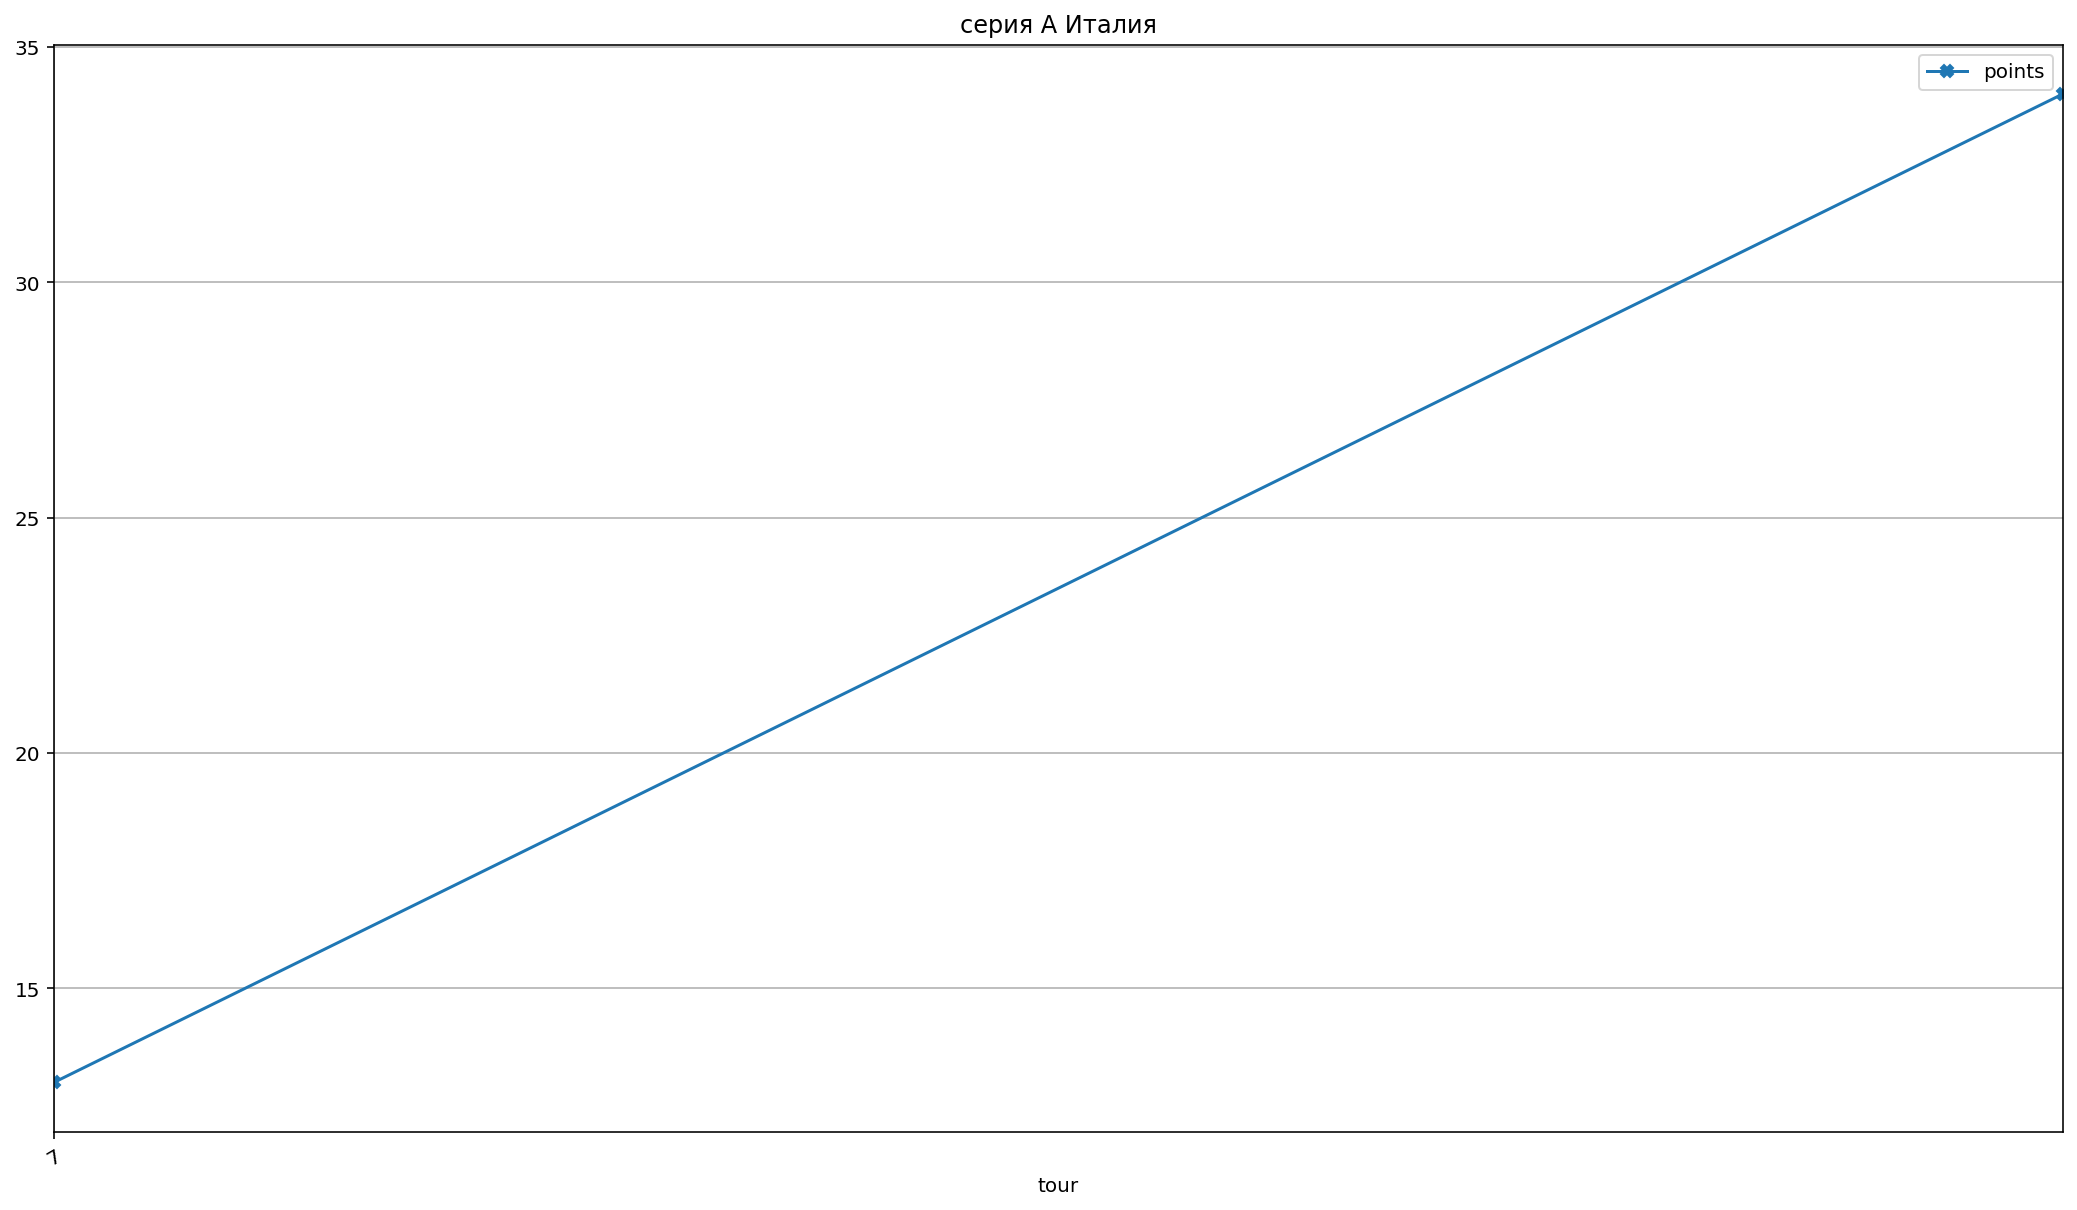

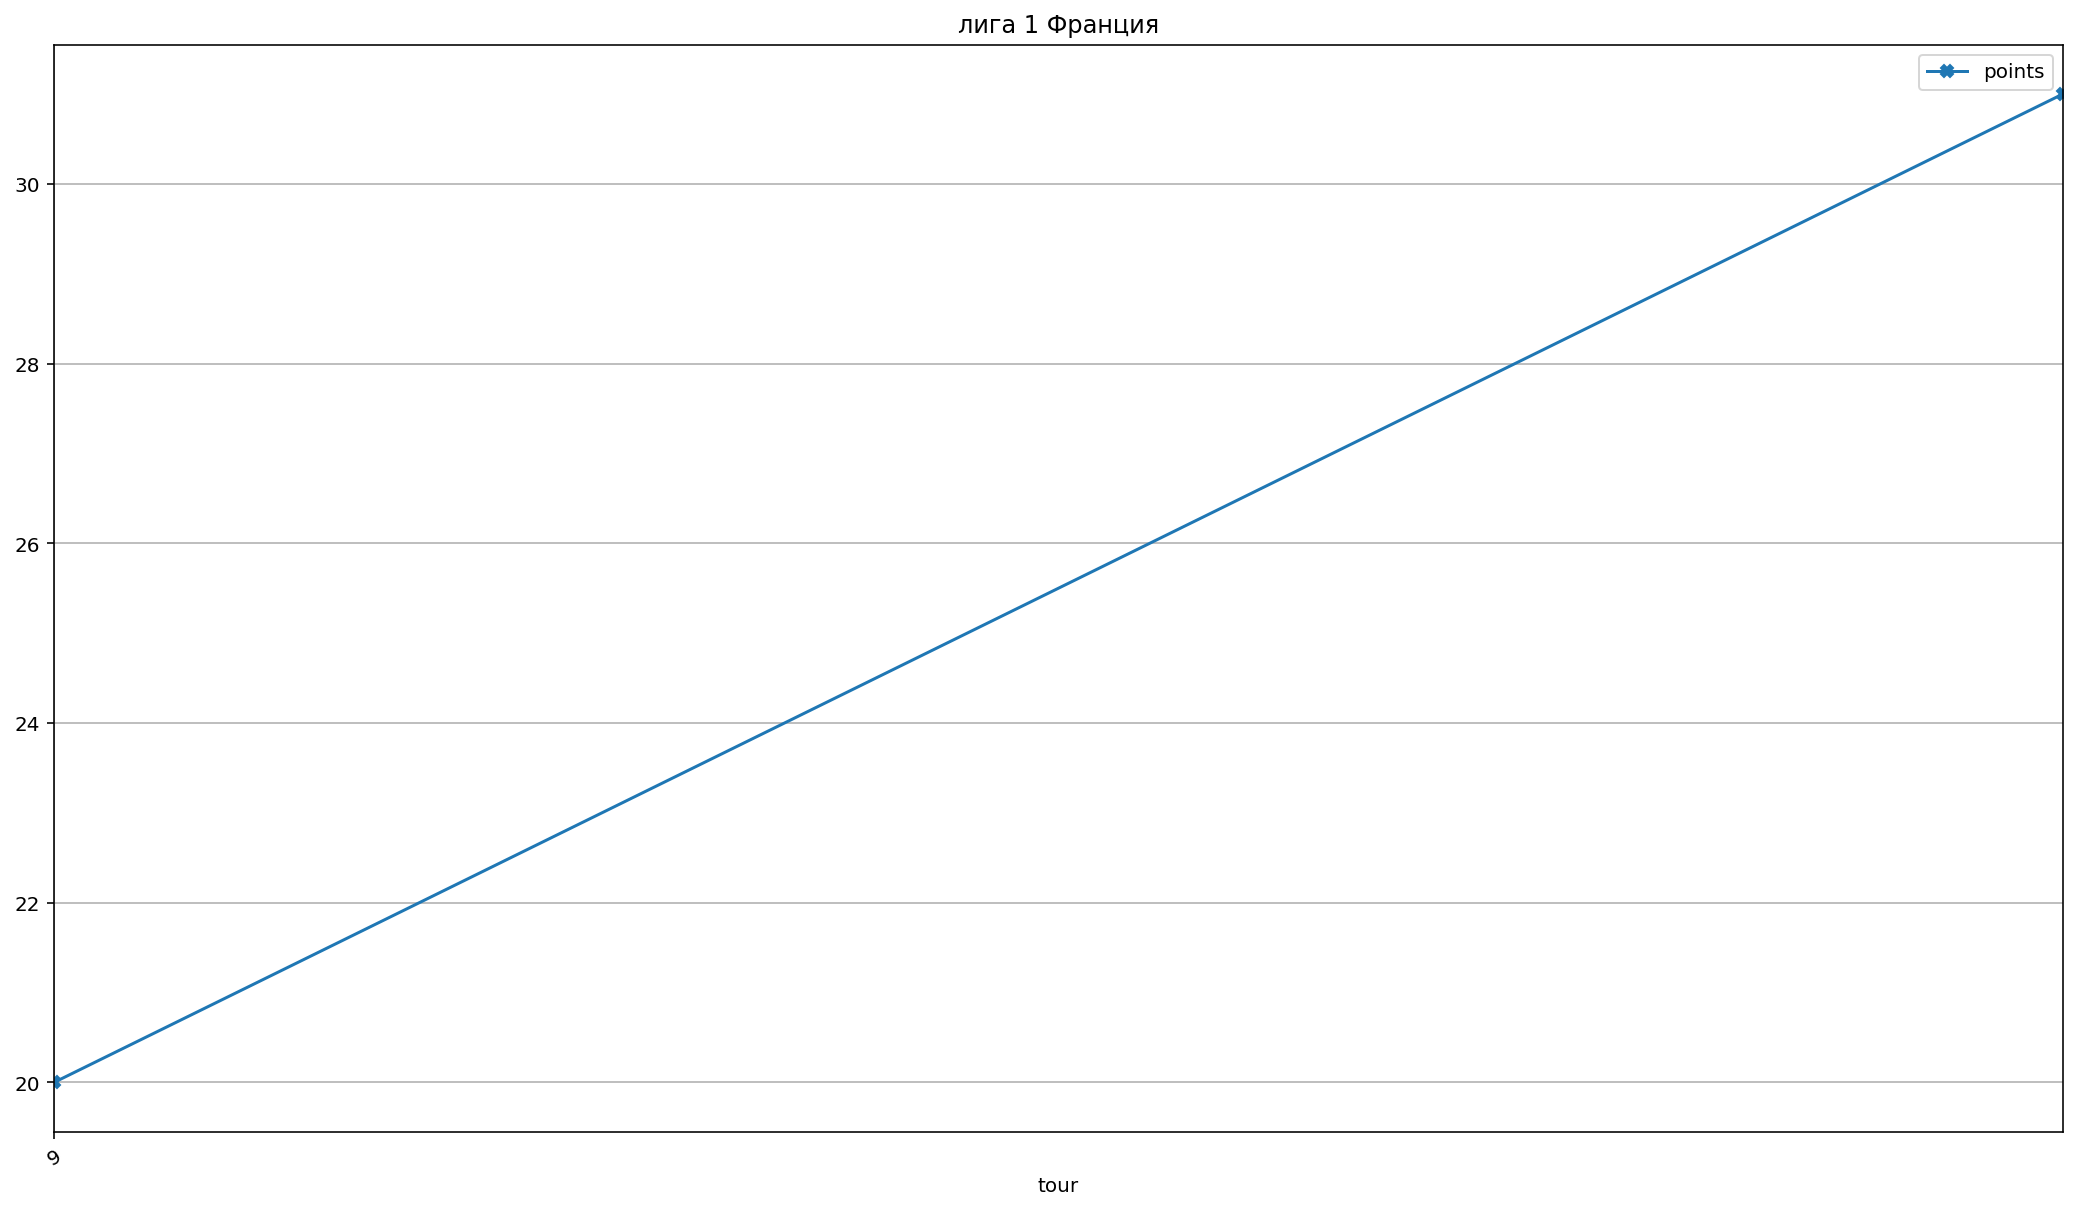

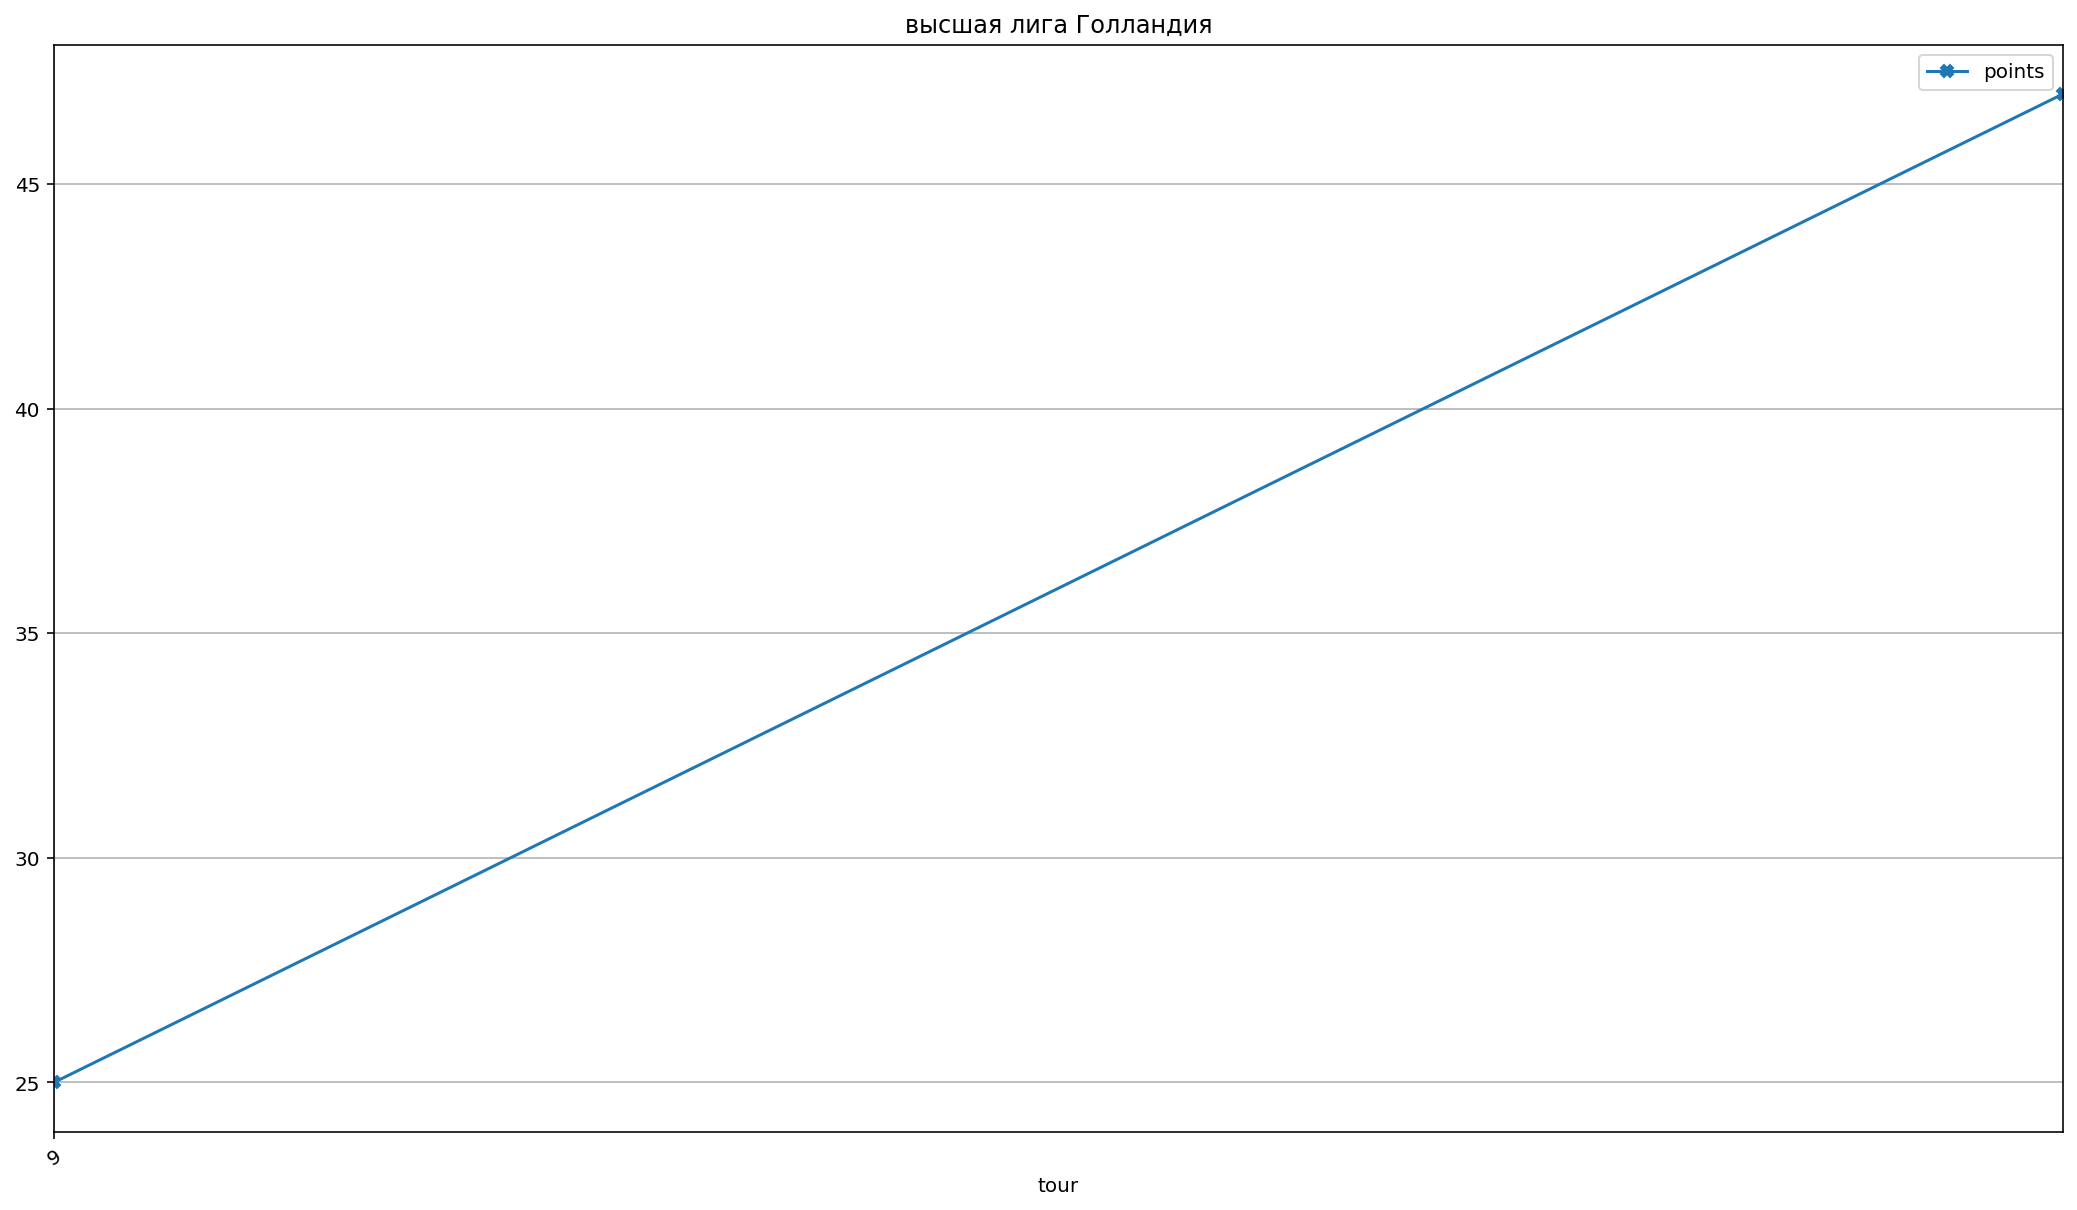

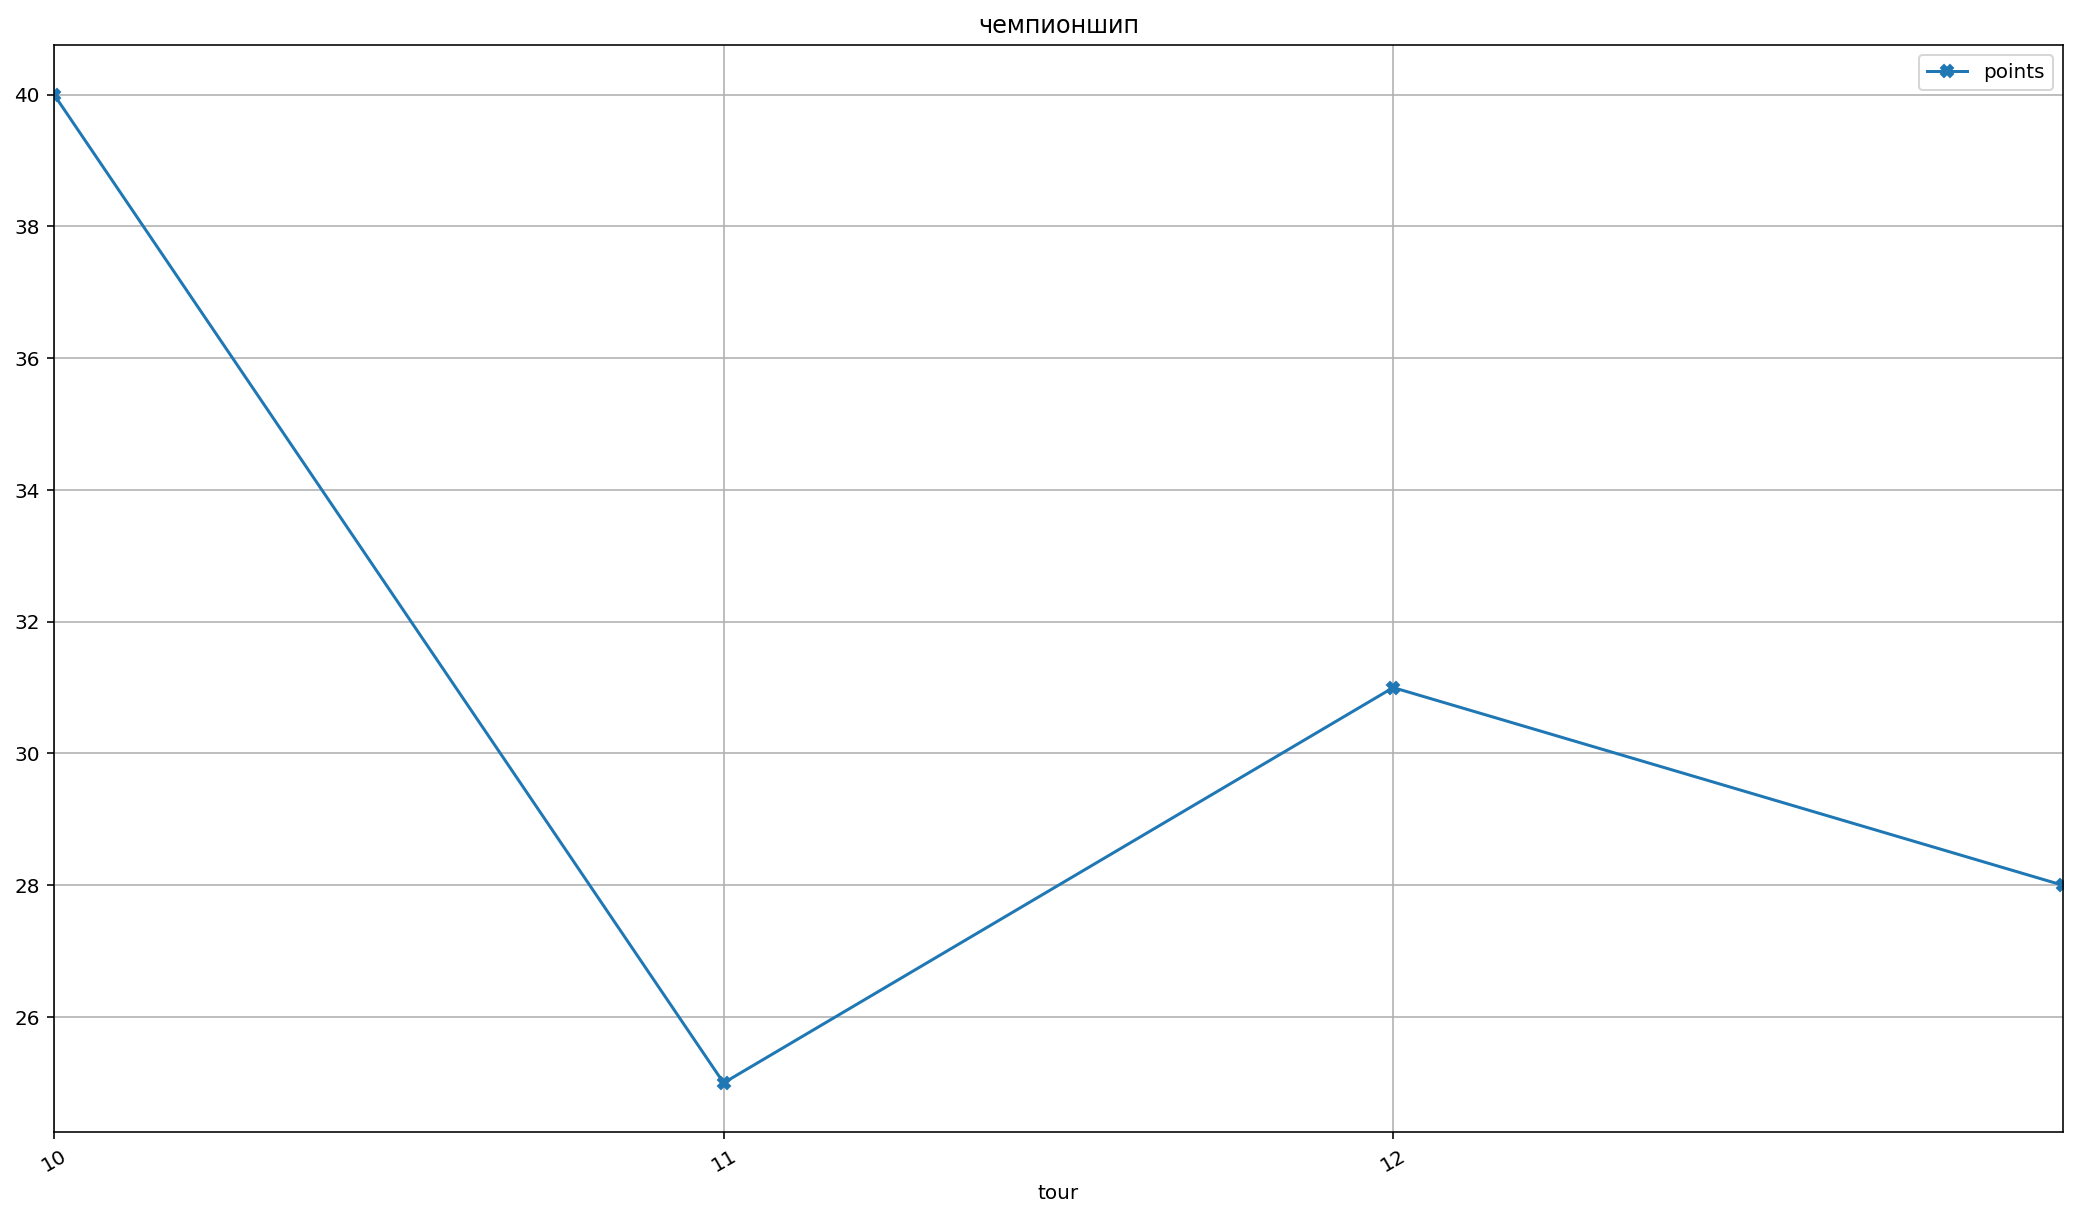

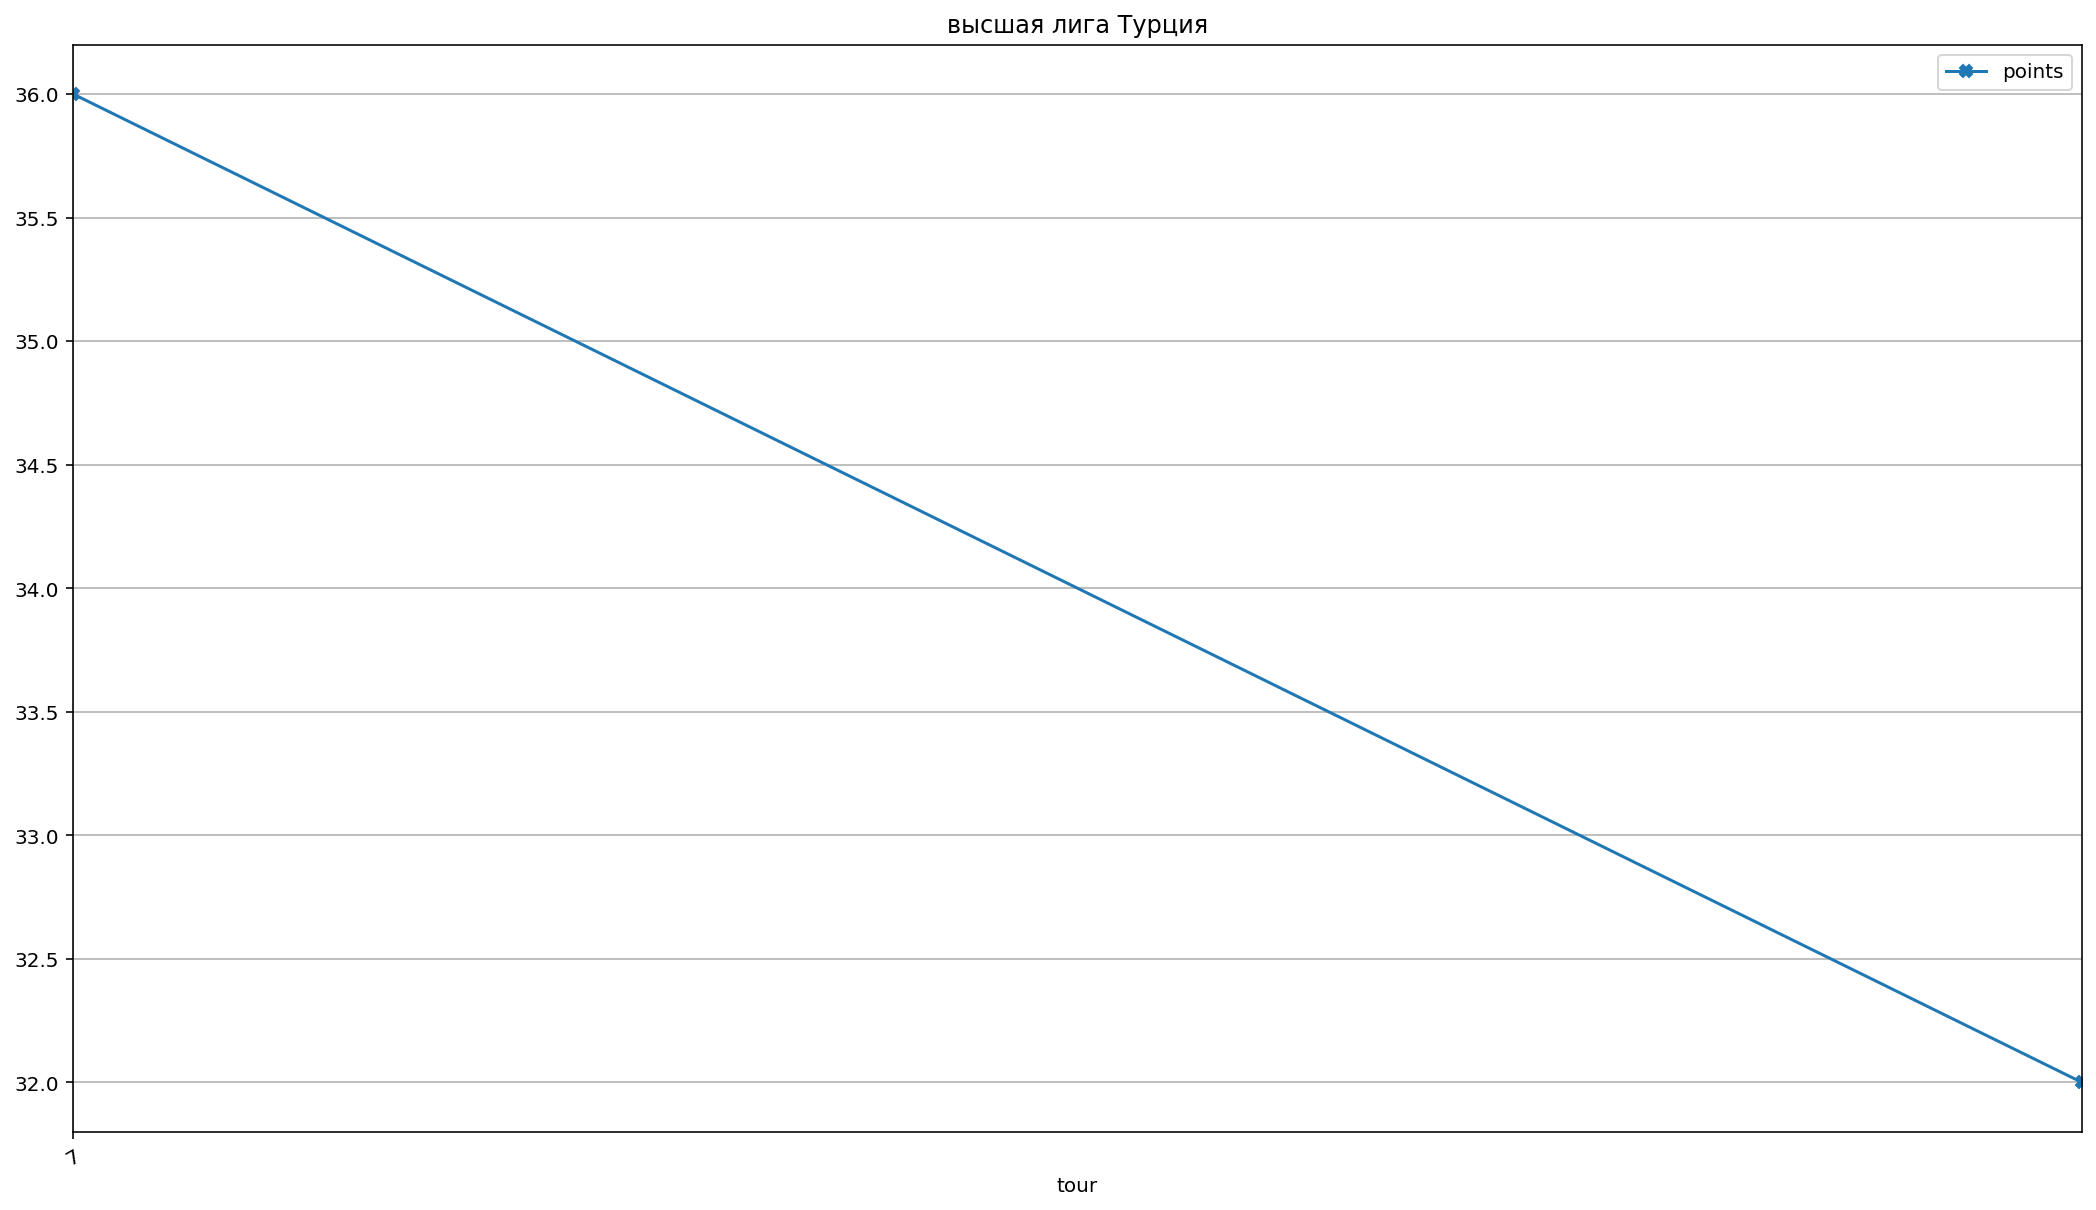

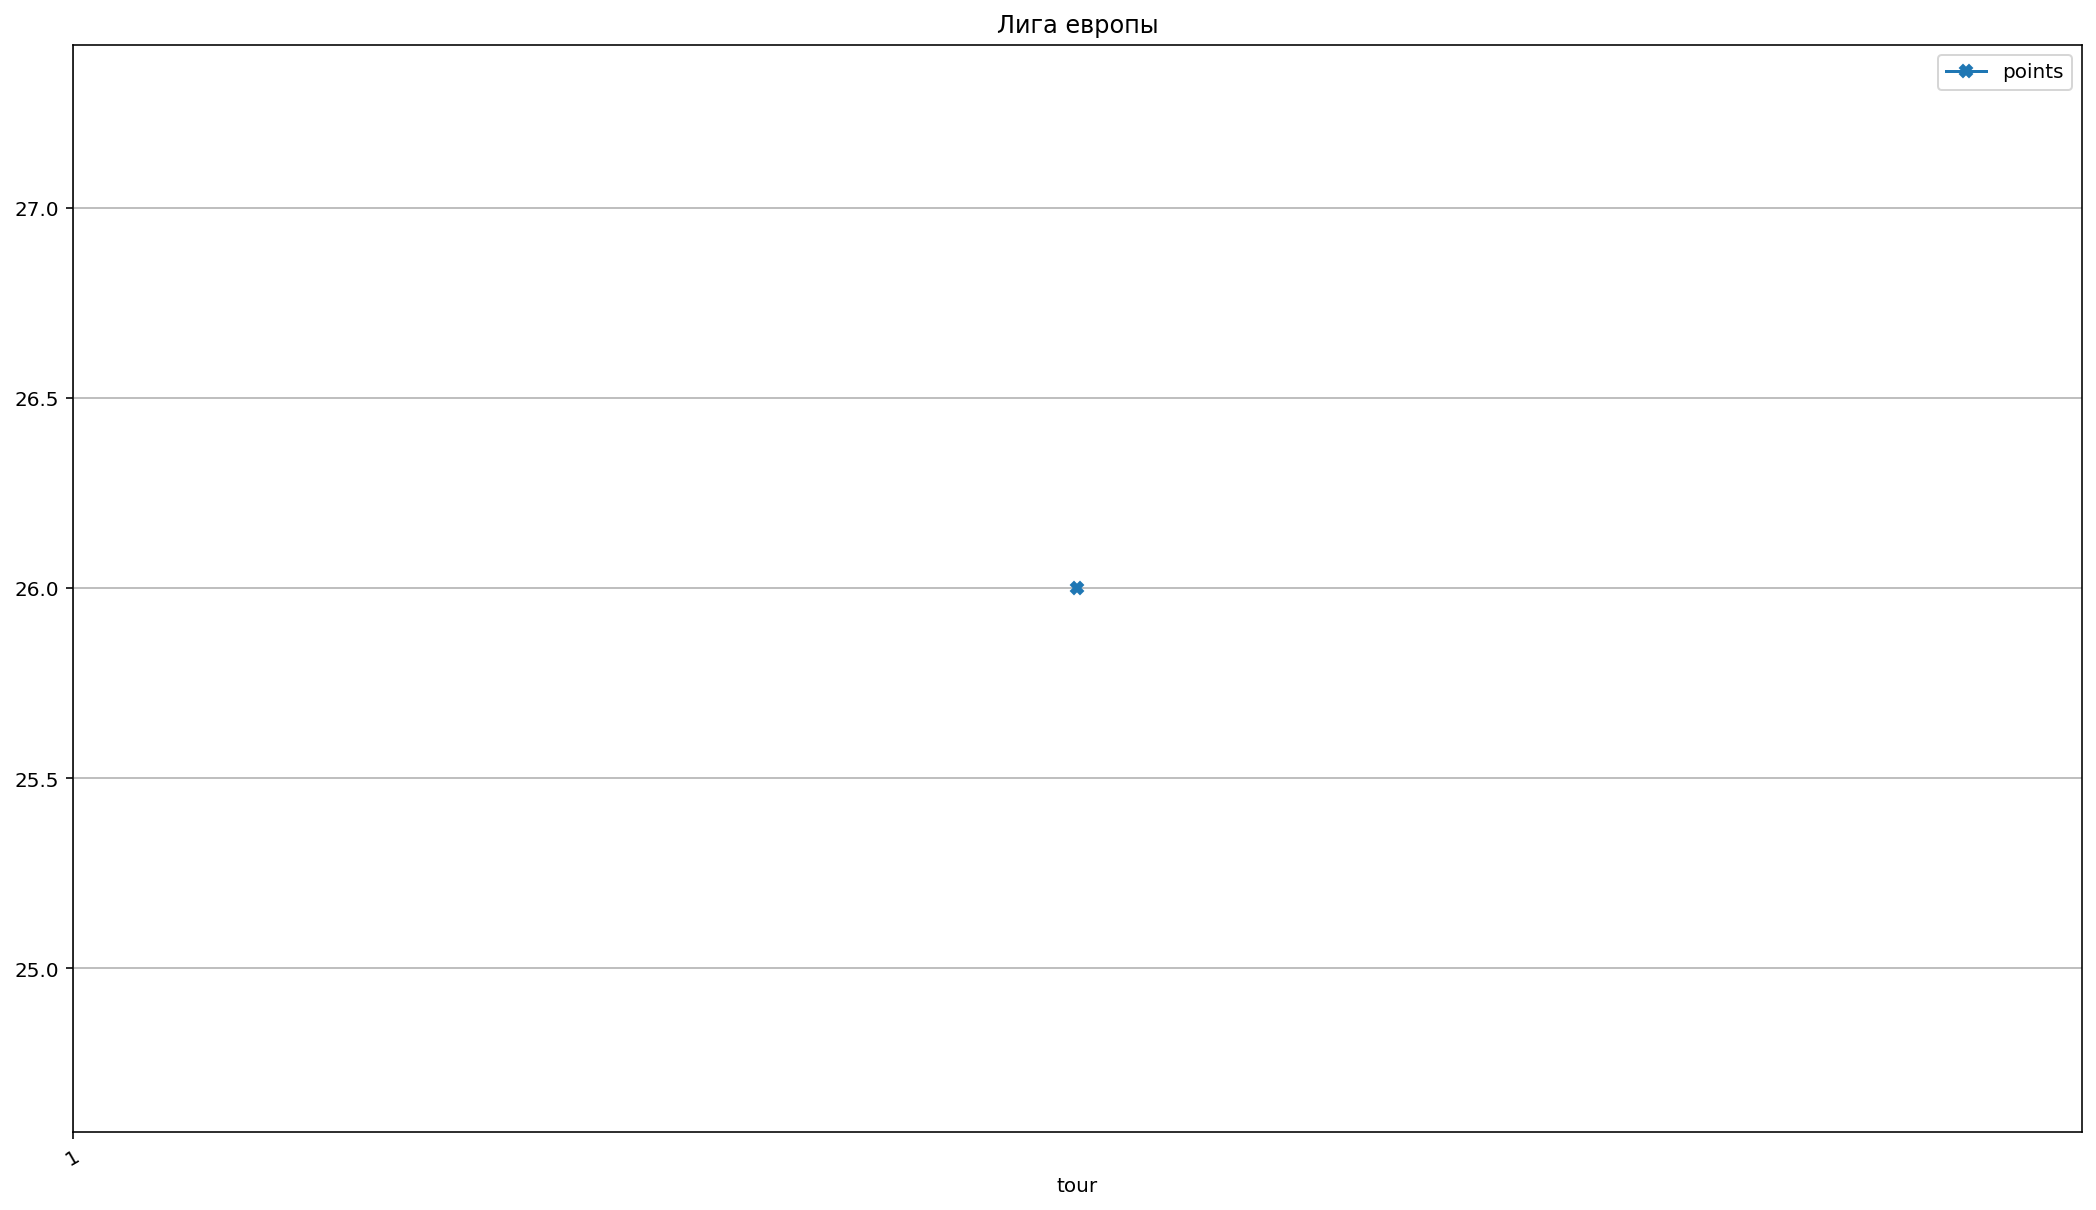

In [38]:
for key in settings["fantasy_settings"]["tournaments"]:
    get_plot_statistics(sports, key, settings)

In [14]:
settings["fantasy_settings"]

{'login': 'd.utiralov@gmail.com',
 'url_login': 'https://sports.ru/login',
 'password': '41cda56553',
 'tounaments': {'PL': {'team_id': 2150635,
   'tournament_id': 52,
   'season_id': 7380,
   'number_subs': 3,
   'max_player_one_team': 2},
  'RPL': {'team_id': 2104286,
   'tournament_id': 31,
   'season_id': 7371,
   'number_subs': 3,
   'max_player_one_team': 2},
  'CL': {'team_id': 2179415,
   'tournament_id': 57,
   'season_id': 6855,
   'number_subs': 3,
   'max_player_one_team': 2},
  'бундеслига Германия': {'team_id': 2194810,
   'tournament_id': 50,
   'season_id': 7390,
   'number_subs': 3,
   'max_player_one_team': 2},
  'Ла Лига': {'team_id': 2194809,
   'tournament_id': 49,
   'season_id': 7393,
   'number_subs': 3,
   'max_player_one_team': 2},
  'серия А Италия': {'team_id': 2194811,
   'tournament_id': 48,
   'season_id': 7471,
   'number_subs': 3,
   'max_player_one_team': 2},
  'лига 1 Франция': {'team_id': 2194812,
   'tournament_id': 51,
   'season_id': 7383,
   'nu

In [ ]:
parser = MyHTMLParser() 
resp = sports.getMainFantasyPage()
resp.text
#resp = sports.getMainFantasyPage()
#parser.feed(resp.text)
#resp.text